Explanation of Key Steps:

Data Loading: The dataset should have a Date column and a Value column (for sales or stock prices). It is crucial to set the Date column as the index for time series analysis.

Visualization: Plot the data to visualize trends and patterns like seasonality and fluctuations.

Train/Test Split: Split the dataset into a training set (80%) and a testing set (20%).

ARIMA Model: ARIMA is a time series model that combines autoregressive (AR), differencing (I), and moving average (MA) components. In the example, we used order=(1, 1, 1), but this can be tuned based on your dataset using techniques like grid search.

Forecasting: Use the trained model to predict future values (the test set in this case).

Evaluation: Evaluate the model's performance using metrics like Mean Squared Error (MSE).

Future Forecast: Optionally, you can forecast future values beyond the test set (e.g., predicting sales for the next 12 months).


Notes:
Choosing ARIMA parameters: The order=(p, d, q) parameters for ARIMA are:

p: The number of lag observations in the model (AR term).
d: The number of times the data is differenced to make it stationary.
q: The size of the moving average window.
These parameters can be optimized using techniques like grid search or through trial and error.

Model evaluation: We used Mean Squared Error (MSE) here, but other metrics like Root Mean Squared Error (RMSE) or Mean Absolute Error (MAE) can also be used.

Data Preprocessing: Ensure your time series data is clean (e.g., no missing values). If there are missing dates, you may need to handle them using techniques like interpolation.

Libraries Used:
statsmodels: Contains the ARIMA model for time series analysis.
pandas: For data manipulation and handling time series data.
matplotlib: For visualizing the data and forecasted values.
sklearn: For calculating evaluation metrics like MSE.

In [ ]:
%pip install statsmodels

In [ ]:
%pip install matplotlib

In [3]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [8]:
# Step 2: Load the dataset
# Assuming you have the dataset in a CSV file
data = pd.read_csv('sales.csv',encoding='latin-1', parse_dates=['ORDERDATE'], index_col='ORDERDATE')

In [9]:
# Step 3: Preprocess the data
# Ensure that the "ORDERDATE" is in datetime format (it should already be if you used `parse_dates`)
# Group data by month and sum the sales
monthly_sales = data.resample('M').agg({'SALES': 'sum'})

C:\Users\shrey\AppData\Local\Temp\ipykernel_16672\1279665173.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data.resample('M').agg({'SALES': 'sum'})


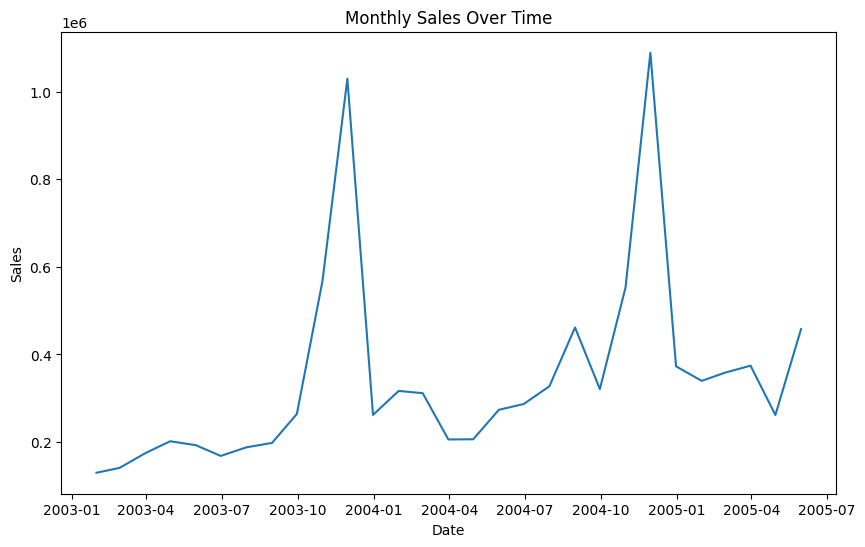

In [10]:
# Step 4: Plot the data to visualize the trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales)
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [11]:
# Step 5: Split the data into training and testing sets
train_size = int(len(monthly_sales) * 0.8)  # 80% training, 20% testing
train, test = monthly_sales[:train_size], monthly_sales[train_size:]

In [12]:
# Step 6: Fit the ARIMA model (p, d, q) - Example: (1, 1, 1)
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()


In [13]:
# Step 7: Forecast the future values (out-of-sample)
forecast = model_fit.forecast(steps=len(test))  # Forecast for the test set period

In [14]:
# Step 8: Evaluate the model
# Calculate Mean Squared Error for model evaluation
mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error: {mse:.4f}')

Mean Squared Error: 160529489831.4142


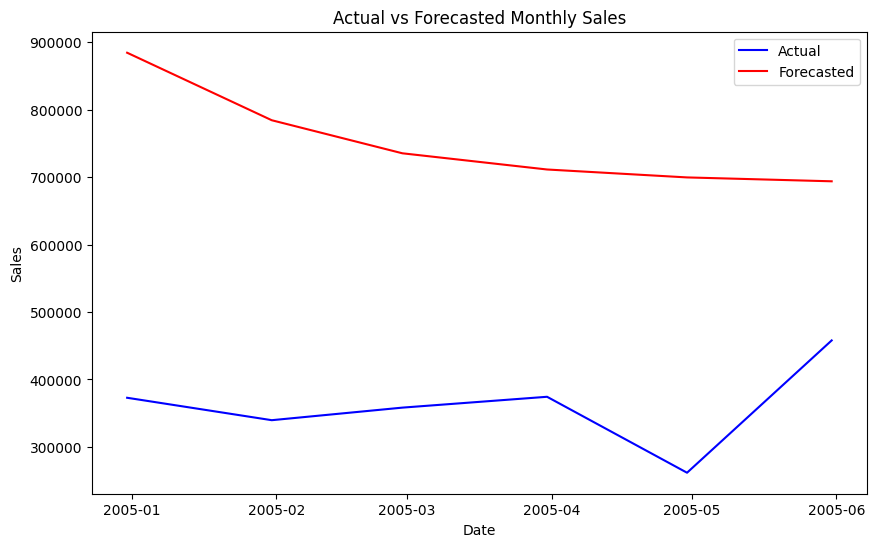

In [15]:
# Plot the actual vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(test.index, forecast, label='Forecasted', color='red')
plt.title('Actual vs Forecasted Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [16]:
# Step 9: Forecast future values (optional, beyond the test set)
future_forecast = model_fit.forecast(steps=12)  # Forecasting for the next 12 months (example)
print("Future Forecast (Next 12 months):")
print(future_forecast)

Future Forecast (Next 12 months):
2004-12-31    884539.434995
2005-01-31    784400.880663
2005-02-28    735367.581872
2005-03-31    711358.204001
2005-04-30    699601.902876
2005-05-31    693845.376535
2005-06-30    691026.667218
2005-07-31    689646.473375
2005-08-31    688970.655179
2005-09-30    688639.737724
2005-10-31    688477.702487
2005-11-30    688398.361196
Freq: ME, Name: predicted_mean, dtype: float64


In [ ]:
# Step 8 continued.... Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Mean Squared Error (MSE)
mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error (MSE): {mse:.4f}')

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

# Mean Absolute Error (MAE)
mae = mean_absolute_error(test, forecast)
print(f'Mean Absolute Error (MAE): {mae:.4f}')

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((test - forecast) / test)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.4f}%')

Mean Squared Error (MSE): 160529489831.4142
Root Mean Squared Error (RMSE): 400661.3156
Mean Absolute Error (MAE): 390804.0018
Mean Absolute Percentage Error (MAPE): nan%


**Accuracy Metrics Summary:**

MSE: Measures average squared errors, penalizes large errors more. 

RMSE: Square root of MSE, same units as the original values. 

MAE: Average absolute errors, easier to interpret and doesn't penalize larger errors.

MAPE: Percentage error, useful when comparing across different datasets or models.

**Interpreting the Metrics:**

MSE and RMSE: Lower values indicate better accuracy. However, MSE penalizes larger errors more, which may not always be desirable depending on your context.

MAE: Lower values indicate better accuracy, and it's often more interpretable since it represents the average error directly.

MAPE: Lower values indicate better accuracy, and it's often used to understand how well the model generalizes in terms of percentage error. A MAPE less than 10% is usually considered a good model.